<a href="https://colab.research.google.com/github/pthkbs123/SkillTreePython-DataAnalysis/blob/main/05.%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EA%B8%B0%EB%B0%98%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D/ch05_04_%EA%B8%B0%EC%B4%88%EB%AA%A8%EB%8D%B8%EA%B5%AC%ED%98%84_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch05.04. 기초모델 구현 - Perceptron
---
* 날짜: 2022-05-16
* 이름: 박태현

## 학습내용
    - 이진 분류 개념에 대해 이해한다.
    - Perceptron의 프로세스를 이해한다 
    - Perceptron 알고리즘을 구현한다.

```
import numpy as np
import matplotlib.pyplot as plt
```

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/content/drive/MyDrive/딥러닝 프레임워크실무/SkillTreePython-DataAnalysis-main/05.머신러닝기반데이터분석')

In [ ]:
from data_loader import iris_loader

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 클래스 작성
---

In [ ]:
class Perceptron():
  def __init__(self, lr=0.001, random_state=1):
    self.lr=lr
    self.seed = np.random.RandomState(random_state)

  def init_weights(self, X):
    size = X.shape[1]
    self.w = self.seed.normal(0,0.01,size= size + 1)

  def model(self, X):
    return np.dot(X, self.w[:-1]) + self.w[-1]
    

  def predict(self, X):
    y_hat = self.model(X)
    logit = np.where(y_hat >= 0.5, 1, 0)
    return logit


  def loss(self, y, y_logit):
    return np.abs(y - y_logit)
    

  def accuracy(self, y, y_logit):
    return np.count_nonzero(y == y_logit) / len(y)
    

  def evaluate(self, X, y):
    y_logit = self.predict(X)
    loss = self.loss(y, y_logit)
    loss = loss.sum() / len(y)
    acc = self.accuracy(y, y_logit)
    return loss, acc


  def fit(self, X, y, epochs=10, show_params=False):

    self.init_weights(X) # 가중치 초기화
    self.history=dict(loss=[], acc=[]) # history 초기화

    for epoch in range(epochs):    
      # 최적화
      for xi, yi in zip(X,y):
        y_logit = self.predict(xi)
        self.w[:-1] += self.lr * (yi - y_logit) * xi
        self.w[-1] += self.lr * (yi - y_logit)

      # 평가 및 결과 저장
      loss, acc = self.evaluate(X, y)
      self.history['loss'].append(loss)
      self.history['acc'].append(acc)
      print(f'[Epoch {epoch}] loss: {np.round(loss,2)}  acc: {np.round(acc,2)}')
      if show_params: print(self.w)

  # 데이터 흐름 시각화
  def draw_dflow(self, X, y, title='', figsize=(8,4)):
    plt.figure(figsize=figsize)
    plt.title(title)
    
    y_hat = self.model(X)
    y_pred = self.predict(X)
    plt.plot(y, label='y', marker='o')
    plt.plot(y_hat, label='$\hat{y}$', marker='.', linestyle='--')
    plt.plot(y_pred, label='$\logit$', marker='.', linestyle='--')
    plt.legend()
    plt.show()

  # 학습 곡선 시각화
  def draw_lcurve(self, title='', figsize=(8,4)):
    plt.figure(figsize=figsize)
    plt.title(title)
    plt.plot(self.history['acc'], label='acc', marker='o')
    plt.plot(self.history['loss'], label='loss', marker='o')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

## Iris 데이터로 분류 진행
---

### **데이터 로드**

In [ ]:
X_train, X_test, y_train, y_test = iris_loader(1, 0)

(100, 4) (100,) [5.1 3.5 1.4 0.2] 0
(75, 4) (25, 4) (75,) (25,)


### **학습전 성능 평가**

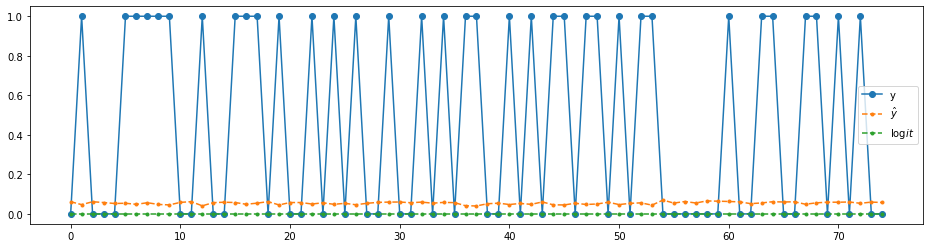

성능:  (0.4666666666666667, 0.5333333333333333)


In [ ]:
model = Perceptron()

model.init_weights(X_train)
model.draw_dflow(X_train, y_train, figsize=(16,4))
print('성능: ', model.evaluate(X_train, y_train))

### **학습**

In [ ]:
history = model.fit(X_train, y_train, epochs=10)

[Epoch 0] loss: 0.05  acc: 0.95
[Epoch 1] loss: 0.04  acc: 0.96
[Epoch 2] loss: 0.04  acc: 0.96
[Epoch 3] loss: 0.04  acc: 0.96
[Epoch 4] loss: 0.01  acc: 0.99
[Epoch 5] loss: 0.01  acc: 0.99
[Epoch 6] loss: 0.03  acc: 0.97
[Epoch 7] loss: 0.03  acc: 0.97
[Epoch 8] loss: 0.03  acc: 0.97
[Epoch 9] loss: 0.03  acc: 0.97


### **학습 후 성능평가**

성능:  (0.02666666666666667, 0.9733333333333334)


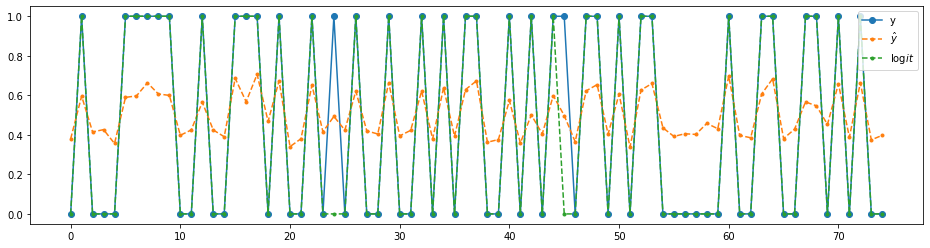

In [ ]:
print('성능: ', model.evaluate(X_train, y_train))
model.draw_dflow(X_train, y_train, figsize=(16,4))

### **학습곡선**

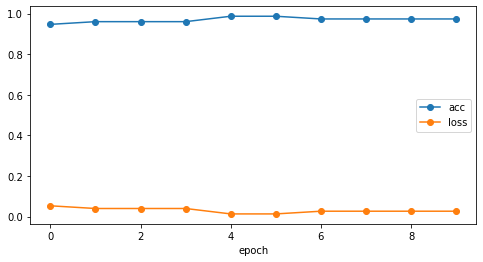

In [ ]:
model.draw_lcurve()

### **테스트셋 성능평가**

성능:  (0.04, 0.96)


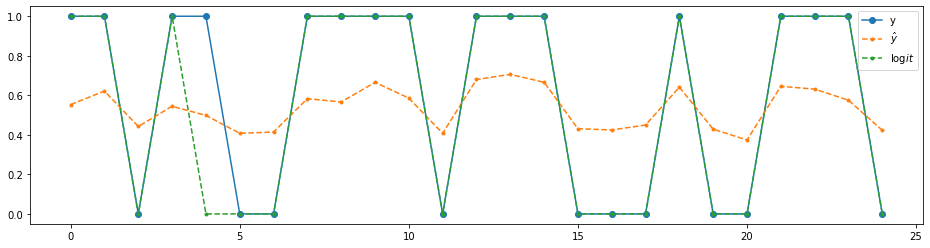

In [ ]:
print('성능: ', model.evaluate(X_test, y_test))
model.draw_dflow(X_test, y_test, figsize=(16,4))

### **하이퍼파라미터에 따른 성능평가**

In [ ]:
for lr in [0.00001, 0.0001, 0.001, 0.01, 0.1]:
  model = Perceptron(lr=lr)
  history = model.fit(X_train, y_train, epochs=10)
  print(f'===== lr {lr} ==== {model.evaluate(X_test, y_test)}')

[Epoch 0] loss: 0.47  acc: 0.53
[Epoch 1] loss: 0.47  acc: 0.53
[Epoch 2] loss: 0.47  acc: 0.53
[Epoch 3] loss: 0.47  acc: 0.53
[Epoch 4] loss: 0.47  acc: 0.53
[Epoch 5] loss: 0.47  acc: 0.53
[Epoch 6] loss: 0.47  acc: 0.53
[Epoch 7] loss: 0.47  acc: 0.53
[Epoch 8] loss: 0.47  acc: 0.53
[Epoch 9] loss: 0.47  acc: 0.53
===== lr 1e-05 ==== (0.6, 0.4)
[Epoch 0] loss: 0.47  acc: 0.53
[Epoch 1] loss: 0.36  acc: 0.64
[Epoch 2] loss: 0.07  acc: 0.93
[Epoch 3] loss: 0.04  acc: 0.96
[Epoch 4] loss: 0.05  acc: 0.95
[Epoch 5] loss: 0.04  acc: 0.96
[Epoch 6] loss: 0.05  acc: 0.95
[Epoch 7] loss: 0.04  acc: 0.96
[Epoch 8] loss: 0.05  acc: 0.95
[Epoch 9] loss: 0.05  acc: 0.95
===== lr 0.0001 ==== (0.04, 0.96)
[Epoch 0] loss: 0.05  acc: 0.95
[Epoch 1] loss: 0.03  acc: 0.97
[Epoch 2] loss: 0.03  acc: 0.97
[Epoch 3] loss: 0.03  acc: 0.97
[Epoch 4] loss: 0.03  acc: 0.97
[Epoch 5] loss: 0.03  acc: 0.97
[Epoch 6] loss: 0.03  acc: 0.97
[Epoch 7] loss: 0.03  acc: 0.97
[Epoch 8] loss: 0.03  acc: 0.97
[Epoch 